<a href="https://colab.research.google.com/github/StephenMuuo/dsc-phase-1-project/blob/master/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

Please fill out:
* Student name:
* Student pace: self paced / part time / full time
* Scheduled project review date/time:
* Instructor name:
* Blog post URL:


Student name: Stephen Muuo Munyiala----
Student pace: Part time----
Scheduled project review date/time: 28/07/2024----
Instructor name; Samwel Jane.----

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [3]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1=pd.read_csv('/content/bom.movie_gross.csv.gz')
df2=pd.read_csv('/content/imdb.title.basics.csv.gz')
df3=pd.read_csv('/content/imdb.title.ratings.csv.gz')

In [6]:
#Merging the datasets
df2_and_df3=pd.merge(df2,df3,how='inner',on='tconst')
df2_and_df3 .head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [7]:
df1.rename (columns={'title':'primaryTitle'},inplace=True)
df1.head()

,primaryTitle,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
df2_and_df3.rename(columns={'primary_title':'primaryTitle'},inplace=True)
df2_and_df3.head()

,tconst,primaryTitle,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [117]:
#creating the final merged dataset
final_df=pd.merge(df2_and_df3,df1,how='inner',on='primaryTitle')
final_df.head()

,tconst,primaryTitle,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013


In [10]:
#Checking all the information present in the dataset
final_df .shape
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primaryTitle     3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 283.9+ KB


In [11]:
#Checking for null values.
final_df.isnull().sum()

tconst                0
primaryTitle          0
original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [12]:
#Replacing the null values to create complete data.
final_df[['runtime_minutes','genres','studio','domestic_gross','foreign_gross']] = final_df[['runtime_minutes','genres','studio','domestic_gross','foreign_gross']].fillna('Other')

In [13]:
#Confirming there are no null values.
final_df.isnull().sum()

tconst             0
primaryTitle       0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

In [14]:
#Checking for duplicates.
final_df.duplicated().sum()

0

In [15]:
final_df.columns

Index(['tconst', 'primaryTitle', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'studio',
       'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

Data Visualisation.

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<ipython-input-124-b2ae73e35608>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genres',y='averagerating',data=final_df.sort_values(by='averagerating',ascending=False).head(5),palette='rainbow')


<Axes: title={'center': 'Most popular genres'}, xlabel='genres', ylabel='averagerating'>

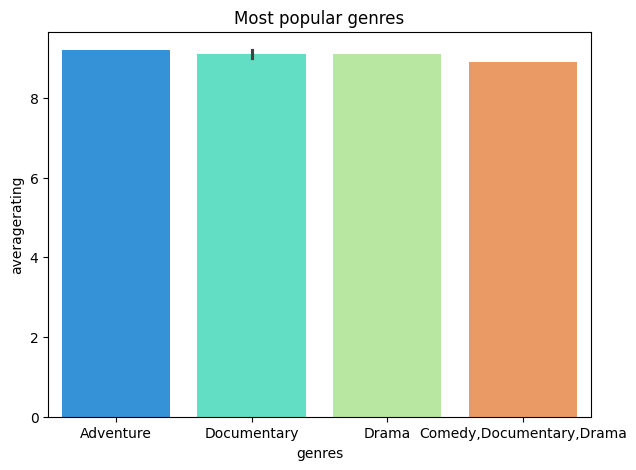

In [124]:
#Most popular genres
final_df.sort_values(by='averagerating',ascending=False).head(5)
plt.figure(figsize=(7,5))
plt.title('Most popular genres')
sns.barplot(x='genres',y='averagerating',data=final_df.sort_values(by='averagerating',ascending=False).head(5),palette='rainbow')

<ipython-input-120-0746fefd451a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genres',y='numvotes',data=final_df.sort_values(by='numvotes',ascending=False).head(5),palette='rainbow')


<Axes: title={'center': 'Most voted genres'}, xlabel='genres', ylabel='numvotes'>

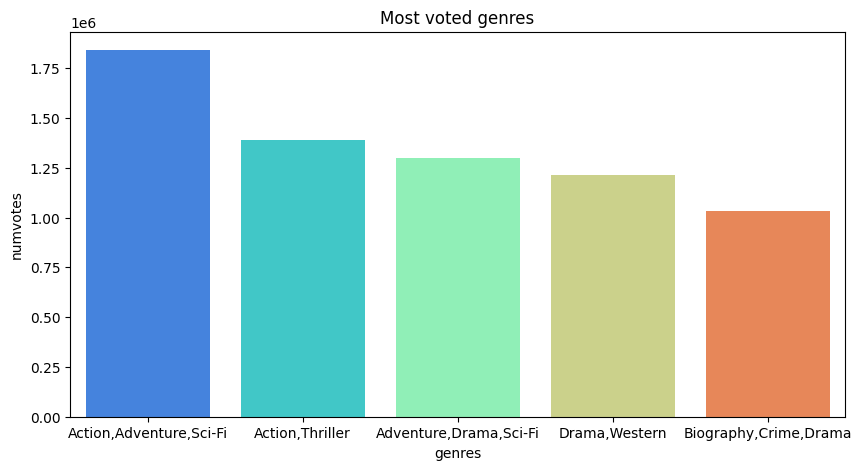

In [120]:
#Most voted genres
final_df.sort_values( by='numvotes',ascending=False).head
plt.figure(figsize=(10,5))
plt.title('Most voted genres')
sns.barplot(x='genres',y='numvotes',data=final_df.sort_values(by='numvotes',ascending=False).head(5),palette='rainbow')

<ipython-input-119-505d00810fc3>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='averagerating',y='studio',data=final_df.sort_values(by='averagerating',ascending=False).head(5),palette='rainbow')


<Axes: title={'center': 'Studios average film rating'}, xlabel='averagerating', ylabel='studio'>

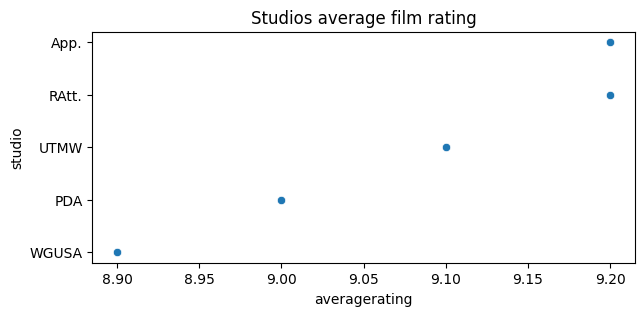

In [119]:
#Studios average film rating.
final_df.sort_values(by='averagerating',ascending=True).head(5)
plt.figure(figsize=(7,3))
plt.title('Studios average film rating')
sns.scatterplot(x='averagerating',y='studio',data=final_df.sort_values(by='averagerating',ascending=False).head(5),palette='rainbow')